# **DIFUSI**

* Dalam FISIKA, difusi adalah perpindahan molekul dari konsentrasi tinggi ke rendah.  
* Dalam ML, berkurangnya informasi dari sebuah data karena intervensi (ikut campur) noise (kebisingan).

![](https://developer-blogs.nvidia.com/wp-content/uploads/2022/04/Generation-with-Diffusion-Models.png)

# **DIFFUSION MODEL**

*Algoritma - memperoleh data berkualitas tinggi dengan : menambah noise pada data dan membalikkan prosesnya*

- bisa mengembalikan dan mendapatkan informasi pada data secara detail dan akurat.
- Menurukan kualitas data dengan noise, hanya untuk merekonstruksinya ke bentuk aslinya atau mengubahnya menjadi sesuatu yang baru.

# **CARA KERJA DIFFUSION MODEL**

* Model melatih neural network untuk memasukkan derau ke data (difusi maju)
* Model membalikkan proses tersebut secara metodis (difusi mundur)

## **1. Data preprocessing**

langkah-langkah utama dalam memformat data sebelum proses difusi:

1. **Pembersihan Data**: Hapus outlier dan data yang tidak relevan.
2. **Normalisasi Data**: Skala fitur agar konsisten (misalnya, mengubah rentang data ke [0, 1]).
3. **Augmentasi Data**: Tingkatkan keragaman data (misalnya, rotasi, perubahan ukuran, atau pencerminan gambar).
4. **Standardisasi Data**: Sesuaikan data agar memiliki distribusi normal (misalnya, dengan mengubah rata-rata menjadi 0 dan deviasi standar menjadi 1).
5. **Pra-Pemrosesan Tipe Data Spesifik**:
   - Untuk teks: Penanganan tokenisasi, stemming, atau lemmatization.
   - Untuk gambar: Perbaiki masalah seperti distorsi atau pencahayaan yang buruk.
6. **Menangani Ketidakseimbangan Kelas**: Terutama dalam data yang memiliki distribusi kelas yang tidak merata.

## **Noising and Denoising (ALL REPRESENTATION)**

![](https://blog.kakaocdn.net/dn/AwM4R/btsGNCdKX4W/nwEwZwCr4xdAtkf9n1KIwk/img.png)

## **2. Noising : Proses Difusi Maju**

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc2288626861a1_656087d1d88278538f110480_forward-diffusion.webp)

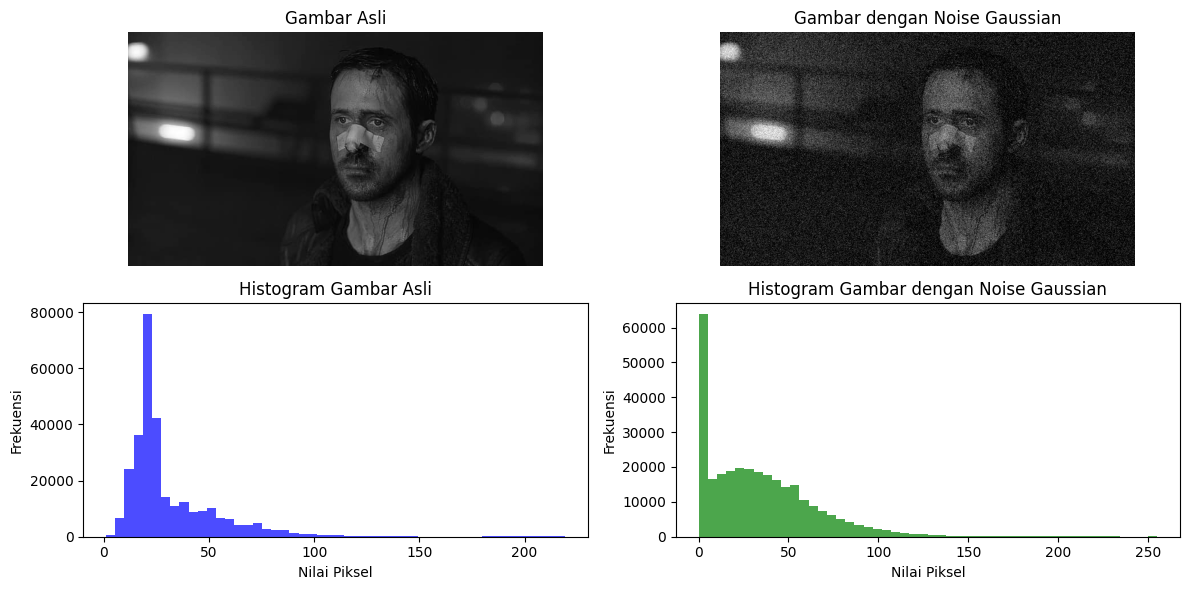

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Fungsi untuk menambahkan noise Gaussian ke gambar
def add_gaussian_noise(image, mean=0, std_dev=25):
    # Mengubah gambar ke format grayscale jika diperlukan
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Membuat noise Gaussian
    noise = np.random.normal(mean, std_dev, image.shape)
    
    # Menambahkan noise ke gambar
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    
    return noisy_image

# Muat gambar (gunakan gambar yang ada di direktori Anda atau URL)
image_path = r'/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/PROJECTS/[1] EMERGING/[2] AI/[3] CV/assets/rg.jpg' 
image = np.array(Image.open(image_path).convert('RGB'))

# Ubah gambar ke grayscale jika perlu
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Tambahkan noise Gaussian
noisy_image = add_gaussian_noise(gray_image, mean=0, std_dev=25)

# Visualisasi gambar asli dan gambar dengan noise
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Gambar dengan Noise Gaussian')
plt.axis('off')

# Histogram dari gambar asli
plt.subplot(2, 2, 3)
plt.hist(gray_image.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram Gambar Asli')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

# Histogram dari gambar dengan noise
plt.subplot(2, 2, 4)
plt.hist(noisy_image.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Histogram Gambar dengan Noise Gaussian')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


* Sampel atau informasi pada gambar bernoise masih terstruktur. (bisa dibalik), rantai Markov.
* pada saat proses desoising kita:
* melatih komputer untuk bisa menganalisa gambar pada saat2 sulit.
* komputer memberikan analisa yang lebih akurat.

*keluaran (gambar noise) menunjukkan bagaimana komputer memulai dengan informasi minimal dapat menghasilkan keluaran yang kaya dan terperinci.*

**Rumus dasar Gaussian Noising**

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc22886268618a_656088a71de1e27984cbbf08_mean.webp)

## **3. Denoising : Proses difusi terbalik**

**Pada Setiap langkah Denoising**

kita membuat komputer : 
- berusaha mengidentifikasi potongan yang tidak cocok (noise) dan menghapusnya,
- sedikit demi sedikit..
- hingga gambar asli muncul kembali.

Proses :

- gambar di atas kertas, menghapus gambar akan meninggalkan noise.
1. T = waktu, semakin tinggi semakin banyak gambar asli yang dihilangkan dari gambar bernoise, 
2. xT = Distribusi Gaussian Isotropik: T max. Pada titik ini, gambar tidak lagi dapat dikenali, karena hanya ada noise.
3. xT adalah Kertas yang Kosong dengan Sedikit Bintik-bintik Acak (Gaussian): Ketika semua detail dihapus, kita hanya memiliki noise (kertas dengan distribusi acak).
4. Belajar Membalikkan Proses:
- Jika kita tahu bagaimana gambar tersebut dihapus,
- kita bisa memulai dari noise acak (kertas bernoise) dan perlahan-lahan menggambar ulang,
- sehingga akhirnya menghasilkan gambar baru yang mirip dengan gambar asli.

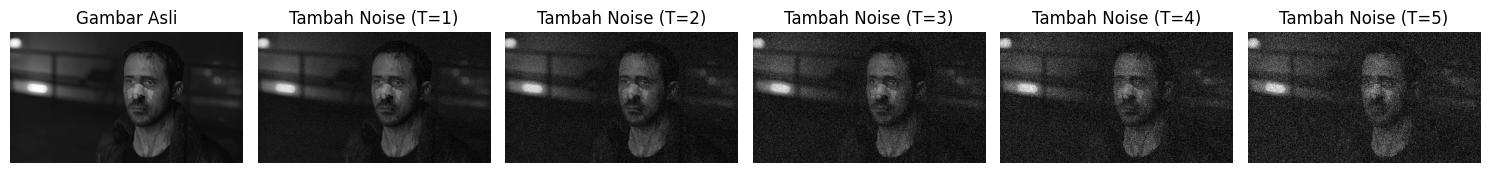

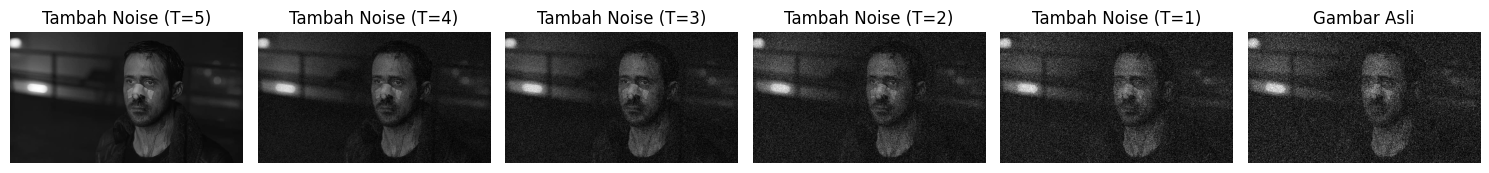

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Fungsi untuk menambahkan noise Gaussian pada gambar
def add_gaussian_noise(image, mean=0, std_dev=25):
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

# Fungsi untuk memvisualisasikan proses difusi maju (penambahan noise)
def forward_diffusion(image, steps=5, std_dev_step=10):
    images = [image]
    for step in range(1, steps + 1):
        noisy_image = add_gaussian_noise(image, std_dev=step * std_dev_step)
        images.append(noisy_image)
    return images

# Fungsi untuk visualisasi
def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Muat gambar dan konversi ke grayscale
image_path = r'/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/PROJECTS/[1] EMERGING/[2] AI/[3] CV/assets/rg.jpg' 
image = np.array(Image.open(image_path).convert('RGB'))
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Proses difusi maju (menambahkan noise bertahap)
diffused_images = forward_diffusion(gray_image, steps=5)

# Buat judul untuk visualisasi
titles = ['Gambar Asli'] + [f'Tambah Noise (T={i})' for i in range(1, 6)]

# Visualisasi proses difusi maju
plot_images(diffused_images, titles)

# Proses difusi terbalik (mengembalikan noise) sederhana dengan mengurangi noise
def reverse_diffusion(images, steps=5, std_dev_step=10):
    recovered_images = [images[-1]]
    for step in range(steps - 1, 0, -1):
        current_image = images[step]
        reduced_noise_image = np.clip(current_image - np.random.normal(0, std_dev_step, current_image.shape), 0, 255).astype(np.uint8)
        recovered_images.append(reduced_noise_image)
    recovered_images.append(images[0])  # Tambahkan gambar asli
    return recovered_images[::-1]  # Balik urutan

# Proses difusi terbalik (menghapus noise bertahap)
recovered_images = reverse_diffusion(diffused_images, steps=5)

# Visualisasi proses difusi terbalik
plot_images(recovered_images, titles[::-1])


## **4. Denoising : Pemodelan dengan Neural Network**


**Misalnya** kita punya gambar yang penuh dengan noise (acak), 
kemudian ingin mengembalikannya ke kondisi sebelumnya, ketika noise lebih sedikit.

**Persoalannya adalah**, untuk mengetahui secara tepat bagaimana gambar terlihat sebelum noise ditambahkan,
Kita perlu menghitung banyak hal yang kompleks tentang pola asli gambar
bagaimana noise mempengaruhi gambar, dan banyak faktor lainnya.

*'artinya kita perlu mengetahui **nilai pasti** setiap pixel yang berubah karena noising'*

**pendekatan** : **MEMPREDIKSI**,
kita bisa mencoba memperkirakan atau menebaknya menggunakan model seperti jaringan saraf. 

Model ini akan dilatih untuk memahami bagaimana data yang bernoise (misalnya gambar bernoise) bisa berubah ke tahap sebelumnya,
dengan mengamati banyak contoh.

#### **Representasi Matematis**

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66b37446e7a112e2df81a8ad_66b36c95567858babfda466e_modeling-the-reverse-process-with-a-neural-network.webp)


- **Distribusi Gaussian (𝑁)** : Ini adalah model yang digunakan untuk memperkirakan bagaimana bentuk gambar sebelumnya **(𝑥𝑡−1)**

berdasarkan gambar yang saat ini penuh dengan noise **(𝑥𝑡)**


- **Distribusi** ini ditentukan oleh **dua parameter** utama:

**Mean ( μθ):** Ini seperti *"tebakan terbaik"* tentang apa gambar tanpa noise-nya.

**Variance ( Σθ):** Ini mewakili *seberapa yakin* kita pada *tebakan tersebut*, atau seberapa tersebar kemungkinan bentuk gambar tanpa noise.

### **Representasi Visual**

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc22886268618e_656088e19afd6cf5bcf22c2d_reverse-diffusion.webp)

*Misalkan Gambar yang sangat buram dan bernoise, misalnya, foto seseorang tapi penuh titik-titik acak.*

Proses **difusi terbalik** ini seperti *"memutar balik waktu"*. 
- Setiap langkah mundur, gambar tersebut menjadi lebih jelas
- sedikit demi sedikit...
- Setiap kali kita mundur satu langkah **(dari 𝑥𝑡 ke 𝑥𝑡−1)**,
- kita mencoba menebak seperti apa gambar tersebut tanpa noise,
- hingga akhirnya gambar asli muncul di **(𝑥0)**
 .

Untuk setiap langkah waktu, kita tidak hanya menghapus noise sembarangan,
tetapi juga mempelajari nilai rata-rata (seperti bentuk dasar dari gambar) dan penyebaran (seberapa bervariasi data tersebut di berbagai area gambar).

## **5. Model Training**

*Model dilatih dengan dasar konsep probabilitas dan distribusi*

**Pelatihan Model Difusi:** Model ini dilatih untuk mengembalikan gambar atau data yang bernoise menjadi bentuk aslinya. Model ini belajar dengan mecoba memperkirakan data sebenarnya tanpa noise, dengan memperbaiki dari tahan ke tahap. hingga data asli bisa diperkirakan.

- *Gaussian Distribution 'distribusi probabilitas blur pada data (yang dianalisa)'*

**Proses Markov:** cara bagaimana proses model difusi bekerja, dengan memprediksi setiap langkah secara bertahap, setiap langkah bergantung pada tahap sebelumnya.

- *Markov 'Setiap proses keadaan selanjutnya bergantung pada keadaan saat ini, begitu juga seterusnya (chain)'*

**Divergensi KL (Kullback-Leibler):** ukuran seberapa berbeda dua distribusi probabilitas, dalam konteks ini seberapa berbeda dua gambar. semakin kecil maka komputer akan bisa menganalisa lebih detail.

- *Divergensi KL 'Nilai ukuran seberapa berbeda data hasil prediksi model dengan data asli (0 artinya sama)'*

**Gaussian dan Divergensi KL:** distribusi gaussian menghasilkan noise yang sederhana dan mudah untuk dianalisa. Divergensi KL akan menghitung atau membandingkan dua probabilitas distribusi gaussian.

## **6. Divergensi KL**

*"Melatih model untuk memprediksi distribusi probabilitas (gaussian noise) yang sudah di tambahkan"*

Pada awalnya, kita menambahkan noise Gaussian pada data asli, dan hasil akhirnya adalah data yang sangat bernoise (seperti gambar kabur yang tidak lagi menyerupai data asli).

Kemudian, Model dilatih untuk memprediksi dan menghilangkan noise pada setiap langkah sehingga secara bertahap bisa menghasilkan kembali data yang bersih.

Tiap langkah, komputer memprediksi data distribusi probabilitas (noise) gambar.

Membandingkan hasil prediksi tiap langkah oleh model dengan data asli akan membuat kita mengetahui nilai keakuratan model.



### **Representasi Matematis**

*Divergensi KL Mengukur seberapa jauh distribusi probabilitas prediksi model dari distribusi sebenarnya. Semakin kecil nilai ini, semakin akurat prediksi model.*

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66b37445e7a112e2df81a79c_66b37292cfbcf617845d1173_kl-divergence.webp)

Rumus Divergensi Kullback-Leibler (KL) yang mengukur seberapa "berbeda" dua distribusi probabilitas, 
𝑃(𝑥) dan 
𝑄(𝑥), di mana:

- P(x) : Distribusi Probabilitas Data Sebenarnya
- Q(x) : Distribusi Data Hasil Prediksi Model
- log( 
q(x) /
p(x)) : Rasio Distribusi Probabilitas Data Sebenarnya dengan Data Diprediksi, mengukur seberapa berbeda.

Jika :
𝑃 dan 𝑄 sangat mirip, nilai KL divergence akan mendekati nol, artinya prediksi model sangat akurat. Jika nilai KL divergence tinggi, artinya ada perbedaan yang signifikan antara prediksi model dan data yang sebenarnya.

*Variational Lower Bound Loss (𝐿𝑣𝑙𝑏) :*

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66b37446e7a112e2df81a8b0_66b372df22b68c17fbcf7560_kullback-leibler-divergence.webp)

Rumus ini menggambarkan total loss yang harus diminimalkan oleh model difusi. 
Lvlb adalah Variational Lower Bound Loss. Loss ini adalah penjumlahan dari beberapa loss yang diakumulasikan dari langkah 

0 hingga waktu 
,di mana 
T adalah jumlah total langkah dalam proses difusi.

Pada setiap langkah difusi, terdapat suatu nilai loss yang dihitung berdasarkan prediksi noise yang dihasilkan oleh model. Total loss adalah akumulasi dari loss pada setiap langkah.

*KL Divergence pada Proses Transisi*

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66b37e8b2ea6e35611d24c1b_66b374c0489325459c0110d9_lvlb-in-terms-of-kl-divergences.webp)

Pada langkah
t−1, model menghitung KL divergence antara distribusi sebenarnya 

q(xt−1∣xt,x0) dan distribusi prediksi model 

p 
θ
​
 (x 
t−1
​
 ∣x 
t
​
 ).


q(x 
t−1
​
 ∣x 
t
​
 ,x 
0
​
 ): Distribusi aktual dari langkah 
t−1 berdasarkan data di langkah 
t dan data asli 
x 
0.


p 
θ
 (x 
t−1
 ∣x 
t
 ): Distribusi prediksi model pada langkah 
t−1 berdasarkan 
x 
t
 .

Ini digunakan untuk melihat seberapa baik model memprediksi distribusi pada setiap langkah difusi terbalik.

*Loss pada Langkah Akhir T:*

Pada langkah terakhir 
T, model juga menghitung KL divergence antara distribusi aktual 
q(x 
T
​
 ∣x 
0
​
 ) dan distribusi prediksi model 
p(x 
T
​
 ).

q(x 
T
​
 ∣x 
0
​
 ): Distribusi sebenarnya di langkah 
T berdasarkan data asli 
x 
0
​

p(x 
T
​
 ): Distribusi prediksi model pada langkah 
T.

Ini adalah KL divergence yang mengukur seberapa baik model memprediksi noise di tahap akhir difusi.

### **Representasi Visual**

![](divergensikl.mp4)

## **7. Diffusion Models**

*Model model pada dasarnya melakukan forward dan reverse diffusion : Menambahkan Noise pada data dan Membalikkan Proses untuk Belajar. Hanya saja berbeda Pendekatan*

- **Pemodelan Genrative Berbasis Skor | Score-based generative models (SGMs)** : Cara model belajar menghasilkan data ekspektasi dengan memperkirakan noise dalam data dan memperbaikinya sedikit demi sedikit hingga mendekati data ekspektasi. *menggunakan score function untuk secara langsung menentukan arah gradien dalam proses denoising.*
- **Model Probabilistik Distribusi yang Ditolak | Denoising diffusion probabilistic models (DDPMs)** : Proses model menyaring noise pada data, sedikit demi sedikit, hingga data aktual terlihat.*lebih fokus pada model probabilistik eksplisit.*
- **Persamaan Differensial Skolastik | Stochastic Differential Equation (SDE)**: Metode matematis yang membantu komputer menangani data yang tidak pasti atau bervariasi (noise).*lebih umum, memodelkan proses perubahan stokastik.*

## **8.Stochastic differential equations (SDE)**

*Persamaan Diferensial Stokastik (SDE) adalah alat matematika yang membantuk komputer menangani data yang tidak pasti atau bervariasi.*

- Dengan : menggambarkan bagaimana noise atau gangguan ditambahkan sedikit demi sedikit ke dalam data dalam model difusi. 
- Representasi Matematis ini : memberikan panduan tentang cara noise ini masuk secara bertahap seiring waktu. Kerangka ini penting karena memberi model difusi kemampuan untuk beradaptasi dengan berbagai jenis data dan aplikasi.
- sehingga : model bisa digunakan untuk berbagai tugas pembuatan atau generatif.

**JADI :**

* Apa: Persamaan matematika yang menggambarkan perubahan data yang melibatkan noise atau ketidakpastian.
* Proses: Alat untuk memodelkan perubahan acak dalam data dari waktu ke waktu, digunakan dalam proses penambahan noise.
* Peran dalam model difusi: SDE digunakan untuk menggambarkan bagaimana noise ditambahkan secara bertahap dalam data selama tahap difusi.

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc228862686191_65608be75079ab1a96ef681b_reverse-sde.webp)

**Forward Stochastic Differential Equaltion (SDE) : Representasi Difusi Maju dalam Bentuk Matematis (Data --> Data + Noise)**

- **x(0)** : Merepresentasikan data asli (pada waktu 0)
- **dx = f(x,t) dt + g(t) dw :**
    - rumus proses difusi maju yang direpresentasikan dengan persamaan stochastik differensial equation.
    - rumus merepresentasikan bagaimana gambar ditambahakan noise secara bertahap
    - **f(x,t)(shifting) :** mengontrol bagaimana gambar berubah dari waktu ke waktu.
    - **g(t) dw :** menunjukkan variabel stokastik yang menggambarkan bagaimana nosie ditambahkan. dw untuk **white noise.**

**Reverse Stochastic Differential Equation (SDE) : Representasi Difusi Mundur dalam Bentuk Matematis (Data + Noise --> Data)**

- **x(T)** : Merepresentasi data setelah Blur (pada waktu T)
- **dx = [f(x,t) - g²(t)∇ₓ log pₜ(x)] dt + g(t) dw :**
    - rumus proses difusi mundur yang merepresentasikan proses difusi mundur dalam matematis
    - **f(x,t) :** (shifting), perubahanan gambar dari waktu ke waktu (tahap ke tahap)
    - **g²(t)∇ₓ log pₜ(x) :** (Score Function),  gradien dari log-likelihood dari distribusi noise. Fungsi ini digunakan untuk "mengarahkan" proses mundur ke arah gambar yang lebih jelas.
    - **g(t) dw :** Ini masih adalah penambahan noise, tapi lebih terkontrol agar noise berkurang seiring waktu.



## **9.Scored-Based Generative Models (SGM's)**

*Mengajar Komputer untuk secara bertahap menghilangkan noise sampai bersih*

**JADI :**
* Apa: Teknik yang mengajarkan model untuk secara bertahap mengurangi noise dari data yang penuh gangguan, hingga mendapatkan kembali data asli.
* Proses: Berfokus pada pembalikan proses difusi, di mana model belajar memperkirakan bagaimana menghapus noise untuk mendapatkan gambar atau data yang jelas,.

![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc228862686220_65608d38719b98273f83584a_sbg.webp)

## **10. Denoising Diffusion Probabilistic Models (DDPM's)**

*menghilangkan noise dari data secara probabilistik*


- Model Probabilistik Distribusi yang Ditolak
- Mempelajari bagaimana noise datambahkan ke data seiring waktu(Discretized).
- Cara membalikkan proses ini untuk mendapakan kembali data asli.
- Dengan : Pendakatan Probabilistik, Menghitung atau memperkirakan data sebelum noise ditambahakan.


![](https://cdn.prod.website-files.com/614c82ed388d53640613982e/66acbdfb02fc22886268621d_65609f066f555009dfa850ee_ddpms.webp)